In [1]:
!pip install tweepy
!pip install vaderSentiment
!pip install python-louvain

^C


In [27]:
# #extract tweets from twitter
# import tweepy 
  
# consumer_key = "" 
# consumer_secret = ""
# access_key = ""
# access_secret = ""

          
# # Authorization to consumer key and consumer secret 
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 

# # Access to user's access key and access secret 
# auth.set_access_token(access_key, access_secret) 

# # Calling api 
# api = tweepy.API(auth) 

# tweets = api.search(q="DelhiVoilence", lang="en", count=80)

# # Empty Array 
# tmp=[]  

# # create array of tweet information: username,  
# # tweet id, date/time, text 
# tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created  
# for j in tweets_for_csv: 
#     # Appending tweets to the empty array tmp 
#     tmp.append(j)  

# # Printing the tweets
# org = tmp
# print(tmp) 

In [26]:
# #get random tweets from bbchealth file
# f = open('C:/Users/sumit/data/bbchealth.txt', "r", encoding="utf8")
# tweets = list(f)
# list_of_tweets = []

# for i in range(len(tweets)):

#     # remove \n from the end after every sentence
#     tweets[i] = tweets[i].strip('\n')

#     # Remove the tweet id and timestamp
#     tweets[i] = tweets[i][50:]

#     # Remove any word that starts with the symbol @
#     tweets[i] = " ".join(filter(lambda x: x[0] != '@', tweets[i].split()))

#     # Remove any URL
#     tweets[i] = re.sub(r"http\S+", "", tweets[i])
#     tweets[i] = re.sub(r"www\S+", "", tweets[i])

#     # remove colons from the end of the sentences (if any) after removing url
#     tweets[i] = tweets[i].strip()
#     tweet_len = len(tweets[i])
#     if tweet_len > 0:
#         if tweets[i][len(tweets[i]) - 1] == ':':
#             tweets[i] = tweets[i][:len(tweets[i]) - 1]

#     # Remove any hash-tags symbols
#     tweets[i] = tweets[i].replace('#', '')

#     # Convert every word to lowercase
#     tweets[i] = tweets[i].lower()

#     # remove punctuations
#     tweets[i] = tweets[i].translate(str.maketrans('', '', string.punctuation))

#     # trim extra spaces
#     tweets[i] = " ".join(tweets[i].split())

#     # convert each tweet from string type to as list<string> using " " as a delimiter
#     list_of_tweets.append(tweets[i].split(' '))
    
# tweets_exp = list_of_tweets[:20]
# tweets_abs = list_of_tweets[:20]

In [16]:
import csv
import re
import string

with open('C:/Users/user/data/#pakistan.csv', encoding="utf8") as csvfile:
    data = list(csv.reader(csvfile))

list_of_tweets = []
for i in range(1, len(data)):
    
    tweet = data[i][3]

    # remove \n from the end after every sentence
    tweet = tweet.strip('\n')

    # Remove any word that starts with the symbol @
    tweet = " ".join(filter(lambda x: x[0] != '@', tweet.split()))

    # Remove any URL
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www\S+", "", tweet)

    # remove colons from the end of the sentences (if any) after removing url
    tweet = tweet.strip()
    tweet_len = len(tweet)
    if tweet_len > 0:
        if tweet[len(tweet) - 1] == ':':
            tweet = tweet[:len(tweet) - 1]

    # Remove any hash-tags symbols
    tweet = tweet.replace('#', '')

    # Convert every word to lowercase
    tweet = tweet.lower()

    # remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # trim extra spaces
    tweet = " ".join(tweet.split())

    # convert each tweet from string type to as list<string> using " " as a delimiter
    list_of_tweets.append(tweet.split(' '))
    
tweets_exp = list_of_tweets[:500]
tweets_abs = list_of_tweets[:500]

In [17]:
print('found %d tweets' % len(list_of_tweets))

found 4987 tweets


In [18]:
#getting expression words from pwords and nwords file

f = open('C:/Users/user/data/pwords.txt', "r", encoding="utf8")
pwords = list(f)
    
f = open('C:/Users/user/data/nwords.txt', "r", encoding="utf8")
nwords = list(f)

for i in range(len(pwords)):
    pwords[i] = pwords[i].strip('\n')
for i in range(len(nwords)):
    nwords[i] = nwords[i].strip('\n')

In [19]:
#removing expression words from tweets
for n,text in enumerate(tweets_abs):  
    ntext = []
    for word in text:
        if word not in pwords and word not in nwords:
            ntext.append(word) 
    tweets_abs[n] = ntext
    
    
for n,text in enumerate(tweets_exp):  
    ntext = []
    for word in text:
        if word in pwords or word in nwords:
            ntext.append(word) 
    tweets_exp[n] = ntext
    

#joining the words again into sentences
# seperator = ' '
# for n,text in enumerate(tweets_abs):
#     tweets_abs[n] = seperator.join(text)

tweets_abs = [' '.join(i) for i in tweets_abs]
tweets_exp = [' '.join(i) for i in tweets_exp]

In [21]:
#working on abstraction score(tweets_abs)........................................................................

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_abs)

doc_term_matrix = sparse_matrix.todense()
df_abs = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())
print(doc_term_matrix)
print(cosine_similarity(df_abs))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.         0.00357613 0.00418399 ... 0.00608408 0.00608408 0.00608408]
 [0.00357613 1.         0.00306388 ... 0.00445529 0.00445529 0.00445529]
 [0.00418399 0.00306388 1.         ... 0.00521259 0.00521259 0.00521259]
 ...
 [0.00608408 0.00445529 0.00521259 ... 1.         1.         1.        ]
 [0.00608408 0.00445529 0.00521259 ... 1.         1.         1.        ]
 [0.00608408 0.00445529 0.00521259 ... 1.         1.         1.        ]]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

Gabs = nx.Graph()

l = len(tweets_abs)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_abs)[i][j] != 0:
            print(i, j)
            Gabs.add_edge(str(i), str(j), weight = cosine_similarity(df_abs)[i][j])

e = [(u, v) for (u, v, d) in Gabs.edges(data=True)]
#esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(Gabs)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gabs, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gabs, pos, edgelist=e,
                       width=.3)
# labels
nx.draw_networkx_labels(Gabs, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 18

2 433
2 434
2 435
2 436
2 437
2 438
2 439
2 440
2 441
2 442
2 443
2 444
2 445
2 446
2 447
2 448
2 449
2 450
2 451
2 452
2 453
2 454
2 455
2 456
2 457
2 458
2 459
2 460
2 461
2 462
2 463
2 464
2 465
2 466
2 467
2 468
2 469
2 470
2 471
2 472
2 473
2 474
2 475
2 476
2 477
2 478
2 479
2 480
2 481
2 482
2 483
2 484
2 485
2 486
2 487
2 488
2 489
2 490
2 491
2 492
2 493
2 494
2 495
2 496
2 497
2 498
2 499
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
3 54
3 55
3 56
3 57
3 58
3 59
3 60
3 61
3 62
3 63
3 64
3 65
3 66
3 67
3 68
3 69
3 70
3 71
3 72
3 73
3 74
3 75
3 76
3 77
3 78
3 79
3 80
3 81
3 82
3 83
3 84
3 85
3 86
3 87
3 88
3 89
3 90
3 91
3 92
3 93
3 94
3 95
3 96
3 97
3 98
3 99
3 100
3 101
3 102
3 103
3 104
3 105
3 106
3 107
3 108
3 109
3 110
3 111
3 112
3 113
3 114
3 115
3 116
3 117
3 118
3 119
3 12

5 370
5 371
5 373
5 374
5 375
5 376
5 377
5 378
5 379
5 380
5 381
5 382
5 383
5 384
5 385
5 386
5 387
5 388
5 389
5 390
5 391
5 392
5 393
5 394
5 395
5 396
5 397
5 398
5 399
5 400
5 401
5 402
5 403
5 404
5 405
5 406
5 407
5 408
5 409
5 410
5 411
5 412
5 413
5 414
5 415
5 416
5 417
5 418
5 419
5 420
5 421
5 422
5 423
5 424
5 425
5 426
5 427
5 428
5 429
5 430
5 431
5 432
5 433
5 434
5 435
5 436
5 437
5 438
5 439
5 440
5 441
5 442
5 443
5 444
5 445
5 446
5 447
5 448
5 449
5 450
5 451
5 452
5 453
5 454
5 455
5 456
5 457
5 458
5 459
5 460
5 461
5 462
5 463
5 464
5 465
5 466
5 467
5 468
5 469
5 470
5 471
5 472
5 473
5 474
5 475
5 476
5 477
5 478
5 479
5 480
5 481
5 482
5 483
5 484
5 485
5 486
5 487
5 488
5 489
5 490
5 491
5 492
5 493
5 494
5 495
5 496
5 497
5 498
5 499
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
6 30
6 31
6 32
6 33
6 34
6 35
6 36
6 37
6 38
6 39
6 40
6 41
6 42
6 43
6 44
6 45
6 46
6 47
6 48
6 49
6 50
6 51
6 52

8 312
8 313
8 314
8 315
8 316
8 317
8 318
8 319
8 320
8 321
8 322
8 323
8 324
8 325
8 326
8 327
8 328
8 329
8 330
8 331
8 332
8 333
8 334
8 335
8 336
8 337
8 338
8 339
8 340
8 341
8 342
8 343
8 344
8 345
8 346
8 347
8 348
8 349
8 350
8 351
8 352
8 353
8 354
8 355
8 356
8 357
8 358
8 359
8 360
8 361
8 362
8 363
8 364
8 365
8 366
8 367
8 368
8 369
8 370
8 371
8 373
8 374
8 375
8 376
8 377
8 378
8 379
8 380
8 381
8 382
8 383
8 384
8 385
8 386
8 387
8 388
8 389
8 390
8 391
8 392
8 393
8 394
8 395
8 396
8 397
8 398
8 399
8 400
8 401
8 402
8 403
8 404
8 405
8 406
8 407
8 408
8 409
8 410
8 411
8 412
8 413
8 414
8 415
8 416
8 417
8 418
8 419
8 420
8 421
8 422
8 423
8 424
8 425
8 426
8 427
8 428
8 429
8 430
8 431
8 432
8 433
8 434
8 435
8 436
8 437
8 438
8 439
8 440
8 441
8 442
8 443
8 444
8 445
8 446
8 447
8 448
8 449
8 450
8 451
8 452
8 453
8 454
8 455
8 456
8 457
8 458
8 459
8 460
8 461
8 462
8 463
8 464
8 465
8 466
8 467
8 468
8 469
8 470
8 471
8 472
8 473
8 474
8 475
8 476
8 477
8 478
8 47

11 158
11 159
11 160
11 161
11 162
11 163
11 164
11 165
11 166
11 167
11 168
11 169
11 170
11 171
11 172
11 173
11 174
11 175
11 176
11 177
11 178
11 179
11 180
11 181
11 182
11 183
11 184
11 185
11 186
11 187
11 188
11 189
11 190
11 191
11 192
11 193
11 194
11 195
11 196
11 197
11 198
11 199
11 200
11 201
11 202
11 203
11 204
11 205
11 206
11 207
11 208
11 209
11 210
11 211
11 212
11 213
11 214
11 215
11 216
11 217
11 218
11 219
11 220
11 221
11 222
11 223
11 224
11 225
11 226
11 227
11 228
11 229
11 230
11 231
11 232
11 233
11 234
11 235
11 236
11 237
11 238
11 239
11 240
11 241
11 242
11 243
11 244
11 245
11 246
11 247
11 248
11 249
11 250
11 251
11 252
11 253
11 254
11 255
11 256
11 257
11 258
11 259
11 260
11 261
11 262
11 263
11 264
11 265
11 266
11 267
11 268
11 269
11 270
11 271
11 272
11 273
11 274
11 275
11 276
11 277
11 278
11 279
11 280
11 281
11 282
11 283
11 284
11 285
11 286
11 287
11 288
11 289
11 290
11 291
11 292
11 293
11 294
11 295
11 296
11 297
11 298
11 299
11 300

13 386
13 387
13 388
13 389
13 390
13 391
13 392
13 393
13 394
13 395
13 396
13 397
13 398
13 399
13 400
13 401
13 402
13 403
13 404
13 405
13 406
13 407
13 408
13 409
13 410
13 411
13 412
13 413
13 414
13 415
13 416
13 417
13 418
13 419
13 420
13 421
13 422
13 423
13 424
13 425
13 426
13 427
13 428
13 429
13 430
13 431
13 432
13 433
13 434
13 435
13 436
13 437
13 438
13 439
13 440
13 441
13 442
13 443
13 444
13 445
13 446
13 447
13 448
13 449
13 450
13 451
13 452
13 453
13 454
13 455
13 456
13 457
13 458
13 459
13 460
13 461
13 462
13 463
13 464
13 465
13 466
13 467
13 468
13 469
13 470
13 471
13 472
13 473
13 474
13 475
13 476
13 477
13 478
13 479
13 480
13 481
13 482
13 483
13 484
13 485
13 486
13 487
13 488
13 489
13 490
13 491
13 492
13 493
13 494
13 495
13 496
13 497
13 498
13 499
14 15
14 16
14 17
14 18
14 19
14 20
14 21
14 22
14 23
14 24
14 25
14 26
14 27
14 28
14 29
14 30
14 31
14 32
14 33
14 34
14 35
14 36
14 37
14 38
14 39
14 40
14 41
14 42
14 43
14 44
14 45
14 46
14 47
14 4

16 144
16 145
16 146
16 147
16 148
16 149
16 150
16 151
16 152
16 153
16 154
16 155
16 156
16 157
16 158
16 159
16 160
16 161
16 162
16 163
16 164
16 165
16 166
16 167
16 168
16 169
16 170
16 171
16 172
16 173
16 174
16 175
16 176
16 177
16 178
16 179
16 180
16 181
16 182
16 183
16 184
16 185
16 186
16 187
16 188
16 189
16 190
16 191
16 192
16 193
16 194
16 195
16 196
16 197
16 198
16 199
16 200
16 201
16 202
16 203
16 204
16 205
16 206
16 207
16 208
16 209
16 210
16 211
16 212
16 213
16 214
16 215
16 216
16 217
16 218
16 219
16 220
16 221
16 222
16 223
16 224
16 225
16 226
16 227
16 228
16 229
16 230
16 231
16 232
16 233
16 234
16 235
16 236
16 237
16 238
16 239
16 240
16 241
16 242
16 243
16 244
16 245
16 246
16 247
16 248
16 249
16 250
16 251
16 252
16 253
16 254
16 255
16 256
16 257
16 258
16 259
16 260
16 261
16 262
16 263
16 264
16 265
16 266
16 267
16 268
16 269
16 270
16 271
16 272
16 273
16 274
16 275
16 276
16 277
16 278
16 279
16 280
16 281
16 282
16 283
16 284
16 285
16 286

18 379
18 380
18 381
18 382
18 383
18 384
18 385
18 386
18 387
18 388
18 389
18 390
18 391
18 392
18 393
18 394
18 395
18 396
18 397
18 398
18 399
18 400
18 401
18 402
18 403
18 404
18 405
18 406
18 407
18 408
18 409
18 410
18 411
18 412
18 413
18 414
18 415
18 416
18 417
18 418
18 419
18 420
18 421
18 422
18 423
18 424
18 425
18 426
18 427
18 428
18 429
18 430
18 431
18 432
18 433
18 434
18 435
18 436
18 437
18 438
18 439
18 440
18 441
18 442
18 443
18 444
18 445
18 446
18 447
18 448
18 449
18 450
18 451
18 452
18 453
18 454
18 455
18 456
18 457
18 458
18 459
18 460
18 461
18 462
18 463
18 464
18 465
18 466
18 467
18 468
18 469
18 470
18 471
18 472
18 473
18 474
18 475
18 476
18 477
18 478
18 479
18 480
18 481
18 482
18 483
18 484
18 485
18 486
18 487
18 488
18 489
18 490
18 491
18 492
18 493
18 494
18 495
18 496
18 497
18 498
18 499
19 20
19 21
19 22
19 23
19 24
19 25
19 26
19 27
19 28
19 29
19 30
19 31
19 32
19 33
19 34
19 35
19 36
19 37
19 38
19 39
19 40
19 41
19 42
19 43
19 44
19 

21 151
21 152
21 153
21 154
21 155
21 156
21 157
21 158
21 159
21 160
21 161
21 162
21 163
21 164
21 165
21 166
21 167
21 168
21 169
21 170
21 171
21 172
21 173
21 174
21 175
21 176
21 177
21 178
21 179
21 180
21 181
21 182
21 183
21 184
21 185
21 186
21 187
21 188
21 189
21 190
21 191
21 192
21 193
21 194
21 195
21 196
21 197
21 198
21 199
21 200
21 201
21 202
21 203
21 204
21 205
21 206
21 207
21 208
21 209
21 210
21 211
21 212
21 213
21 214
21 215
21 216
21 217
21 218
21 219
21 220
21 221
21 222
21 223
21 224
21 225
21 226
21 227
21 228
21 229
21 230
21 231
21 232
21 233
21 234
21 235
21 236
21 237
21 238
21 239
21 240
21 241
21 242
21 243
21 244
21 245
21 246
21 247
21 248
21 249
21 250
21 251
21 252
21 253
21 254
21 255
21 256
21 257
21 258
21 259
21 260
21 261
21 262
21 263
21 264
21 265
21 266
21 267
21 268
21 269
21 270
21 271
21 272
21 273
21 274
21 275
21 276
21 277
21 278
21 279
21 280
21 281
21 282
21 283
21 284
21 285
21 286
21 287
21 288
21 289
21 290
21 291
21 292
21 293

23 398
23 399
23 400
23 401
23 402
23 403
23 404
23 405
23 406
23 407
23 408
23 409
23 410
23 411
23 412
23 413
23 414
23 415
23 416
23 417
23 418
23 419
23 420
23 421
23 422
23 423
23 424
23 425
23 426
23 427
23 428
23 429
23 430
23 431
23 432
23 433
23 434
23 435
23 436
23 437
23 438
23 439
23 440
23 441
23 442
23 443
23 444
23 445
23 446
23 447
23 448
23 449
23 450
23 451
23 452
23 453
23 454
23 455
23 456
23 457
23 458
23 459
23 460
23 461
23 462
23 463
23 464
23 465
23 466
23 467
23 468
23 469
23 470
23 471
23 472
23 473
23 474
23 475
23 476
23 477
23 478
23 479
23 480
23 481
23 482
23 483
23 484
23 485
23 486
23 487
23 488
23 489
23 490
23 491
23 492
23 493
23 494
23 495
23 496
23 497
23 498
23 499
24 25
24 26
24 27
24 28
24 29
24 30
24 31
24 32
24 33
24 34
24 35
24 36
24 37
24 38
24 39
24 40
24 41
24 42
24 43
24 44
24 45
24 46
24 47
24 48
24 49
24 50
24 51
24 52
24 53
24 54
24 55
24 56
24 57
24 58
24 59
24 60
24 61
24 62
24 63
24 64
24 65
24 66
24 67
24 68
24 69
24 70
24 71
24 7

26 181
26 182
26 183
26 184
26 185
26 186
26 187
26 188
26 189
26 190
26 191
26 192
26 193
26 194
26 195
26 196
26 197
26 198
26 199
26 200
26 201
26 202
26 203
26 204
26 205
26 206
26 207
26 208
26 209
26 210
26 211
26 212
26 213
26 214
26 215
26 216
26 217
26 218
26 219
26 220
26 221
26 222
26 223
26 224
26 225
26 226
26 227
26 228
26 229
26 230
26 231
26 232
26 233
26 234
26 235
26 236
26 237
26 238
26 239
26 240
26 241
26 242
26 243
26 244
26 245
26 246
26 247
26 248
26 249
26 250
26 251
26 252
26 253
26 254
26 255
26 256
26 257
26 258
26 259
26 260
26 261
26 262
26 263
26 264
26 265
26 266
26 267
26 268
26 269
26 270
26 271
26 272
26 273
26 274
26 275
26 276
26 277
26 278
26 279
26 280
26 281
26 282
26 283
26 284
26 285
26 286
26 287
26 288
26 289
26 290
26 291
26 292
26 293
26 294
26 295
26 296
26 297
26 298
26 299
26 300
26 301
26 302
26 303
26 304
26 305
26 306
26 307
26 308
26 309
26 310
26 311
26 312
26 313
26 314
26 315
26 316
26 317
26 318
26 319
26 320
26 321
26 322
26 323

28 433
28 434
28 435
28 436
28 437
28 438
28 439
28 440
28 441
28 442
28 443
28 444
28 445
28 446
28 447
28 448
28 449
28 450
28 451
28 452
28 453
28 454
28 455
28 456
28 457
28 458
28 459
28 460
28 461
28 462
28 463
28 464
28 465
28 466
28 467
28 468
28 469
28 470
28 471
28 472
28 473
28 474
28 475
28 476
28 477
28 478
28 479
28 480
28 481
28 482
28 483
28 484
28 485
28 486
28 487
28 488
28 489
28 490
28 491
28 492
28 493
28 494
28 495
28 496
28 497
28 498
28 499
29 30
29 31
29 32
29 33
29 34
29 35
29 36
29 37
29 38
29 39
29 40
29 41
29 42
29 43
29 44
29 45
29 46
29 47
29 48
29 49
29 50
29 51
29 52
29 53
29 54
29 55
29 56
29 57
29 58
29 59
29 60
29 61
29 62
29 63
29 64
29 65
29 66
29 67
29 68
29 69
29 70
29 71
29 72
29 73
29 74
29 75
29 76
29 77
29 78
29 79
29 80
29 81
29 82
29 83
29 84
29 85
29 86
29 87
29 88
29 89
29 90
29 91
29 92
29 93
29 94
29 95
29 96
29 97
29 98
29 99
29 100
29 101
29 102
29 103
29 104
29 105
29 106
29 107
29 108
29 109
29 110
29 111
29 112
29 113
29 114
29 115

31 227
31 228
31 229
31 230
31 231
31 232
31 233
31 234
31 235
31 236
31 237
31 238
31 239
31 240
31 241
31 242
31 243
31 244
31 245
31 246
31 247
31 248
31 249
31 250
31 251
31 252
31 253
31 254
31 255
31 256
31 257
31 258
31 259
31 260
31 261
31 262
31 263
31 264
31 265
31 266
31 267
31 268
31 269
31 270
31 271
31 272
31 273
31 274
31 275
31 276
31 277
31 278
31 279
31 280
31 281
31 282
31 283
31 284
31 285
31 286
31 287
31 288
31 289
31 290
31 291
31 292
31 293
31 294
31 295
31 296
31 297
31 298
31 299
31 300
31 301
31 302
31 303
31 304
31 305
31 306
31 307
31 308
31 309
31 310
31 311
31 312
31 313
31 314
31 315
31 316
31 317
31 318
31 319
31 320
31 321
31 322
31 323
31 324
31 325
31 326
31 327
31 328
31 329
31 330
31 331
31 332
31 333
31 334
31 335
31 336
31 337
31 338
31 339
31 340
31 341
31 342
31 343
31 344
31 345
31 346
31 347
31 348
31 349
31 350
31 351
31 352
31 353
31 354
31 355
31 356
31 357
31 358
31 359
31 360
31 361
31 362
31 363
31 364
31 365
31 366
31 367
31 368
31 369

33 486
33 487
33 488
33 489
33 490
33 491
33 492
33 493
33 494
33 495
33 496
33 497
33 498
33 499
34 35
34 36
34 37
34 38
34 39
34 40
34 41
34 42
34 43
34 44
34 45
34 46
34 47
34 48
34 49
34 50
34 51
34 52
34 53
34 54
34 55
34 56
34 57
34 58
34 59
34 60
34 61
34 62
34 63
34 64
34 65
34 66
34 67
34 68
34 69
34 70
34 71
34 72
34 73
34 74
34 75
34 76
34 77
34 78
34 79
34 80
34 81
34 82
34 83
34 84
34 85
34 86
34 87
34 88
34 89
34 90
34 91
34 92
34 93
34 94
34 95
34 96
34 97
34 98
34 99
34 100
34 101
34 102
34 103
34 104
34 105
34 106
34 107
34 108
34 109
34 110
34 111
34 112
34 113
34 114
34 115
34 116
34 117
34 118
34 119
34 120
34 121
34 122
34 123
34 124
34 125
34 126
34 127
34 128
34 129
34 130
34 131
34 132
34 133
34 134
34 135
34 136
34 137
34 138
34 139
34 140
34 141
34 142
34 143
34 144
34 145
34 146
34 147
34 148
34 149
34 150
34 151
34 152
34 153
34 154
34 155
34 156
34 157
34 158
34 159
34 160
34 161
34 162
34 163
34 164
34 165
34 166
34 167
34 168
34 169
34 170
34 171
34 172
3

36 297
36 298
36 299
36 300
36 301
36 302
36 303
36 304
36 305
36 306
36 307
36 308
36 309
36 310
36 311
36 312
36 313
36 314
36 315
36 316
36 317
36 318
36 319
36 320
36 321
36 322
36 323
36 324
36 325
36 326
36 327
36 328
36 329
36 330
36 331
36 332
36 333
36 334
36 335
36 336
36 337
36 338
36 339
36 340
36 341
36 342
36 343
36 344
36 345
36 346
36 347
36 348
36 349
36 350
36 351
36 352
36 353
36 354
36 355
36 356
36 357
36 358
36 359
36 360
36 361
36 362
36 363
36 364
36 365
36 366
36 367
36 368
36 369
36 370
36 371
36 372
36 373
36 374
36 375
36 376
36 377
36 378
36 379
36 380
36 381
36 382
36 383
36 384
36 385
36 386
36 387
36 388
36 389
36 390
36 391
36 392
36 393
36 394
36 395
36 396
36 397
36 398
36 399
36 400
36 401
36 402
36 403
36 404
36 405
36 406
36 407
36 408
36 409
36 410
36 411
36 412
36 413
36 414
36 415
36 416
36 417
36 418
36 419
36 420
36 421
36 422
36 423
36 424
36 425
36 426
36 427
36 428
36 429
36 430
36 431
36 432
36 433
36 434
36 435
36 436
36 437
36 438
36 439

39 112
39 113
39 114
39 115
39 116
39 117
39 118
39 119
39 120
39 121
39 122
39 123
39 124
39 125
39 126
39 127
39 128
39 129
39 130
39 131
39 132
39 133
39 134
39 135
39 136
39 137
39 138
39 139
39 140
39 141
39 142
39 143
39 144
39 145
39 146
39 147
39 148
39 149
39 150
39 151
39 152
39 153
39 154
39 155
39 156
39 157
39 158
39 159
39 160
39 161
39 162
39 163
39 164
39 165
39 166
39 167
39 168
39 169
39 170
39 171
39 172
39 173
39 174
39 175
39 176
39 177
39 178
39 179
39 180
39 181
39 182
39 183
39 184
39 185
39 186
39 187
39 188
39 189
39 190
39 191
39 192
39 193
39 194
39 195
39 196
39 197
39 198
39 199
39 200
39 201
39 202
39 203
39 204
39 205
39 206
39 207
39 208
39 209
39 210
39 211
39 212
39 213
39 214
39 215
39 216
39 217
39 218
39 219
39 220
39 221
39 222
39 223
39 224
39 225
39 226
39 227
39 228
39 229
39 230
39 231
39 232
39 233
39 234
39 235
39 236
39 237
39 238
39 239
39 240
39 241
39 242
39 243
39 244
39 245
39 246
39 247
39 248
39 249
39 250
39 251
39 252
39 253
39 254

41 386
41 387
41 388
41 389
41 390
41 391
41 392
41 393
41 394
41 395
41 396
41 397
41 398
41 399
41 400
41 401
41 402
41 403
41 404
41 405
41 406
41 407
41 408
41 409
41 410
41 411
41 412
41 413
41 414
41 415
41 416
41 417
41 418
41 419
41 420
41 421
41 422
41 423
41 424
41 425
41 426
41 427
41 428
41 429
41 430
41 431
41 432
41 433
41 434
41 435
41 436
41 437
41 438
41 439
41 440
41 441
41 442
41 443
41 444
41 445
41 446
41 447
41 448
41 449
41 450
41 451
41 452
41 453
41 454
41 455
41 456
41 457
41 458
41 459
41 460
41 461
41 462
41 463
41 464
41 465
41 466
41 467
41 468
41 469
41 470
41 471
41 472
41 473
41 474
41 475
41 476
41 477
41 478
41 479
41 480
41 481
41 482
41 483
41 484
41 485
41 486
41 487
41 488
41 489
41 490
41 491
41 492
41 493
41 494
41 495
41 496
41 497
41 498
41 499
42 43
42 44
42 45
42 46
42 47
42 48
42 49
42 50
42 51
42 52
42 53
42 54
42 55
42 56
42 57
42 58
42 59
42 60
42 61
42 62
42 63
42 64
42 65
42 66
42 67
42 68
42 69
42 70
42 71
42 72
42 73
42 74
42 75
42 7

44 216
44 217
44 218
44 219
44 220
44 221
44 222
44 223
44 224
44 225
44 226
44 227
44 228
44 229
44 230
44 231
44 232
44 233
44 234
44 235
44 236
44 237
44 238
44 239
44 240
44 241
44 242
44 243
44 244
44 245
44 246
44 247
44 248
44 249
44 250
44 251
44 252
44 253
44 254
44 255
44 256
44 257
44 258
44 259
44 260
44 261
44 262
44 263
44 264
44 265
44 266
44 267
44 268
44 269
44 270
44 271
44 272
44 273
44 274
44 275
44 276
44 277
44 278
44 279
44 280
44 281
44 282
44 283
44 284
44 285
44 286
44 287
44 288
44 289
44 290
44 291
44 292
44 293
44 294
44 295
44 296
44 297
44 298
44 299
44 300
44 301
44 302
44 303
44 304
44 305
44 306
44 307
44 308
44 309
44 310
44 311
44 312
44 313
44 314
44 315
44 316
44 317
44 318
44 319
44 320
44 321
44 322
44 323
44 324
44 325
44 326
44 327
44 328
44 329
44 330
44 331
44 332
44 333
44 334
44 335
44 336
44 337
44 338
44 339
44 340
44 341
44 342
44 343
44 344
44 345
44 346
44 347
44 348
44 349
44 350
44 351
44 352
44 353
44 354
44 355
44 356
44 357
44 358

46 496
46 497
46 498
46 499
47 48
47 49
47 50
47 51
47 52
47 53
47 54
47 55
47 56
47 57
47 58
47 59
47 60
47 61
47 62
47 63
47 64
47 65
47 66
47 67
47 68
47 69
47 70
47 71
47 72
47 73
47 74
47 75
47 76
47 77
47 78
47 79
47 80
47 81
47 82
47 83
47 84
47 85
47 86
47 87
47 88
47 89
47 90
47 91
47 92
47 93
47 94
47 95
47 96
47 97
47 98
47 99
47 100
47 101
47 102
47 103
47 104
47 105
47 106
47 107
47 108
47 109
47 110
47 111
47 112
47 113
47 114
47 115
47 116
47 117
47 118
47 119
47 120
47 121
47 122
47 123
47 124
47 125
47 126
47 127
47 128
47 129
47 130
47 131
47 132
47 133
47 134
47 135
47 136
47 137
47 138
47 139
47 140
47 141
47 142
47 143
47 144
47 145
47 146
47 147
47 148
47 149
47 150
47 151
47 152
47 153
47 154
47 155
47 156
47 157
47 158
47 159
47 160
47 161
47 162
47 163
47 164
47 165
47 166
47 167
47 168
47 169
47 170
47 171
47 172
47 173
47 174
47 175
47 176
47 177
47 178
47 179
47 180
47 181
47 182
47 183
47 184
47 185
47 186
47 187
47 188
47 189
47 190
47 191
47 192
47 193
47

49 337
49 338
49 339
49 340
49 341
49 342
49 343
49 344
49 345
49 346
49 347
49 348
49 349
49 350
49 351
49 352
49 353
49 354
49 355
49 356
49 357
49 358
49 359
49 360
49 361
49 362
49 363
49 364
49 365
49 366
49 367
49 368
49 369
49 370
49 371
49 372
49 373
49 374
49 375
49 376
49 377
49 378
49 379
49 380
49 381
49 382
49 383
49 384
49 385
49 386
49 387
49 388
49 389
49 390
49 391
49 392
49 393
49 394
49 395
49 396
49 397
49 398
49 399
49 400
49 401
49 402
49 403
49 404
49 405
49 406
49 407
49 408
49 409
49 410
49 411
49 412
49 413
49 414
49 415
49 416
49 417
49 418
49 419
49 420
49 421
49 422
49 423
49 424
49 425
49 426
49 427
49 428
49 429
49 430
49 431
49 432
49 433
49 434
49 435
49 436
49 437
49 438
49 439
49 440
49 441
49 442
49 443
49 444
49 445
49 446
49 447
49 448
49 449
49 450
49 451
49 452
49 453
49 454
49 455
49 456
49 457
49 458
49 459
49 460
49 461
49 462
49 463
49 464
49 465
49 466
49 467
49 468
49 469
49 470
49 471
49 472
49 473
49 474
49 475
49 476
49 477
49 478
49 479

52 185
52 186
52 187
52 188
52 189
52 190
52 191
52 192
52 193
52 194
52 195
52 196
52 197
52 198
52 199
52 200
52 201
52 202
52 203
52 204
52 205
52 206
52 207
52 208
52 209
52 210
52 211
52 212
52 213
52 214
52 215
52 216
52 217
52 218
52 219
52 220
52 221
52 222
52 223
52 224
52 225
52 226
52 227
52 228
52 229
52 230
52 231
52 232
52 233
52 234
52 235
52 236
52 237
52 238
52 239
52 240
52 241
52 242
52 243
52 244
52 245
52 246
52 247
52 248
52 249
52 250
52 251
52 252
52 253
52 254
52 255
52 256
52 257
52 258
52 259
52 260
52 261
52 262
52 263
52 264
52 265
52 266
52 267
52 268
52 269
52 270
52 271
52 272
52 273
52 274
52 275
52 276
52 277
52 278
52 279
52 280
52 281
52 282
52 283
52 284
52 285
52 286
52 287
52 288
52 289
52 290
52 291
52 292
52 293
52 294
52 295
52 296
52 297
52 298
52 299
52 300
52 301
52 302
52 303
52 304
52 305
52 306
52 307
52 308
52 309
52 310
52 311
52 312
52 313
52 314
52 315
52 316
52 317
52 318
52 319
52 320
52 321
52 322
52 323
52 324
52 325
52 326
52 327

54 481
54 482
54 483
54 484
54 485
54 486
54 487
54 488
54 489
54 490
54 491
54 492
54 493
54 494
54 495
54 496
54 497
54 498
54 499
55 56
55 57
55 58
55 59
55 60
55 61
55 62
55 63
55 64
55 65
55 66
55 67
55 68
55 69
55 70
55 71
55 72
55 73
55 74
55 75
55 76
55 77
55 78
55 79
55 80
55 81
55 82
55 83
55 84
55 85
55 86
55 87
55 88
55 89
55 90
55 91
55 92
55 93
55 94
55 95
55 96
55 97
55 98
55 99
55 100
55 101
55 102
55 103
55 104
55 105
55 106
55 107
55 108
55 109
55 110
55 111
55 112
55 113
55 114
55 115
55 116
55 117
55 118
55 119
55 120
55 121
55 122
55 123
55 124
55 125
55 126
55 127
55 128
55 129
55 130
55 131
55 132
55 133
55 134
55 135
55 136
55 137
55 138
55 139
55 140
55 141
55 142
55 143
55 144
55 145
55 146
55 147
55 148
55 149
55 150
55 151
55 152
55 153
55 154
55 155
55 156
55 157
55 158
55 159
55 160
55 161
55 162
55 163
55 164
55 165
55 166
55 167
55 168
55 169
55 170
55 171
55 172
55 173
55 174
55 175
55 176
55 177
55 178
55 179
55 180
55 181
55 182
55 183
55 184
55 185
5

57 346
57 347
57 348
57 349
57 350
57 351
57 352
57 353
57 354
57 355
57 356
57 357
57 358
57 359
57 360
57 361
57 362
57 363
57 364
57 365
57 366
57 367
57 368
57 369
57 370
57 371
57 372
57 373
57 374
57 375
57 376
57 377
57 378
57 379
57 380
57 381
57 382
57 383
57 384
57 385
57 386
57 387
57 388
57 389
57 390
57 391
57 392
57 393
57 394
57 395
57 396
57 397
57 398
57 399
57 400
57 401
57 402
57 403
57 404
57 405
57 406
57 407
57 408
57 409
57 410
57 411
57 412
57 413
57 414
57 415
57 416
57 417
57 418
57 419
57 420
57 421
57 422
57 423
57 424
57 425
57 426
57 427
57 428
57 429
57 430
57 431
57 432
57 433
57 434
57 435
57 436
57 437
57 438
57 439
57 440
57 441
57 442
57 443
57 444
57 445
57 446
57 447
57 448
57 449
57 450
57 451
57 452
57 453
57 454
57 455
57 456
57 457
57 458
57 459
57 460
57 461
57 462
57 463
57 464
57 465
57 466
57 467
57 468
57 469
57 470
57 471
57 472
57 473
57 474
57 475
57 476
57 477
57 478
57 479
57 480
57 481
57 482
57 483
57 484
57 485
57 486
57 487
57 488

60 218
60 219
60 220
60 221
60 222
60 223
60 224
60 225
60 226
60 227
60 228
60 229
60 230
60 231
60 232
60 233
60 234
60 235
60 236
60 237
60 238
60 239
60 240
60 241
60 242
60 243
60 244
60 245
60 246
60 247
60 248
60 249
60 250
60 251
60 252
60 253
60 254
60 255
60 256
60 257
60 258
60 259
60 260
60 261
60 262
60 263
60 264
60 265
60 266
60 267
60 268
60 269
60 270
60 271
60 272
60 273
60 274
60 275
60 276
60 277
60 278
60 279
60 280
60 281
60 282
60 283
60 284
60 285
60 286
60 287
60 288
60 289
60 290
60 291
60 292
60 293
60 294
60 295
60 296
60 297
60 298
60 299
60 300
60 301
60 302
60 303
60 304
60 305
60 306
60 307
60 308
60 309
60 310
60 311
60 312
60 313
60 314
60 315
60 316
60 317
60 318
60 319
60 320
60 321
60 322
60 323
60 324
60 325
60 326
60 327
60 328
60 329
60 330
60 331
60 332
60 333
60 334
60 335
60 336
60 337
60 338
60 339
60 340
60 341
60 342
60 343
60 344
60 345
60 346
60 347
60 348
60 349
60 350
60 351
60 352
60 353
60 354
60 355
60 356
60 357
60 358
60 359
60 360

63 94
63 95
63 96
63 97
63 98
63 99
63 100
63 101
63 102
63 103
63 104
63 105
63 106
63 107
63 108
63 109
63 110
63 111
63 112
63 113
63 114
63 115
63 116
63 117
63 118
63 119
63 120
63 121
63 122
63 123
63 124
63 125
63 126
63 127
63 128
63 129
63 130
63 131
63 132
63 133
63 134
63 135
63 136
63 137
63 138
63 139
63 140
63 141
63 142
63 143
63 144
63 145
63 146
63 147
63 148
63 149
63 150
63 151
63 152
63 153
63 154
63 155
63 156
63 157
63 158
63 159
63 160
63 161
63 162
63 163
63 164
63 165
63 166
63 167
63 168
63 169
63 170
63 171
63 172
63 173
63 174
63 175
63 176
63 177
63 178
63 179
63 180
63 181
63 182
63 183
63 184
63 185
63 186
63 187
63 188
63 189
63 190
63 191
63 192
63 193
63 194
63 195
63 196
63 197
63 198
63 199
63 200
63 201
63 202
63 203
63 204
63 205
63 206
63 207
63 208
63 209
63 210
63 211
63 212
63 213
63 214
63 215
63 216
63 217
63 218
63 219
63 220
63 221
63 222
63 223
63 224
63 225
63 226
63 227
63 228
63 229
63 230
63 231
63 232
63 233
63 234
63 235
63 236
63 23

65 409
65 410
65 411
65 412
65 413
65 414
65 415
65 416
65 417
65 418
65 419
65 420
65 421
65 422
65 423
65 424
65 425
65 426
65 427
65 428
65 429
65 430
65 431
65 432
65 433
65 434
65 435
65 436
65 437
65 438
65 439
65 440
65 441
65 442
65 443
65 444
65 445
65 446
65 447
65 448
65 449
65 450
65 451
65 452
65 453
65 454
65 455
65 456
65 457
65 458
65 459
65 460
65 461
65 462
65 463
65 464
65 465
65 466
65 467
65 468
65 469
65 470
65 471
65 472
65 473
65 474
65 475
65 476
65 477
65 478
65 479
65 480
65 481
65 482
65 483
65 484
65 485
65 486
65 487
65 488
65 489
65 490
65 491
65 492
65 493
65 494
65 495
65 496
65 497
65 498
65 499
66 67
66 68
66 69
66 70
66 71
66 72
66 73
66 74
66 75
66 76
66 77
66 78
66 79
66 80
66 81
66 82
66 83
66 84
66 85
66 86
66 87
66 88
66 89
66 90
66 91
66 92
66 93
66 94
66 95
66 96
66 97
66 98
66 99
66 100
66 101
66 102
66 103
66 104
66 105
66 106
66 107
66 108
66 109
66 110
66 111
66 112
66 113
66 114
66 115
66 116
66 117
66 118
66 119
66 120
66 121
66 122
66 1

68 299
68 300
68 301
68 302
68 303
68 304
68 305
68 306
68 307
68 308
68 309
68 310
68 311
68 312
68 313
68 314
68 315
68 316
68 317
68 318
68 319
68 320
68 321
68 322
68 323
68 324
68 325
68 326
68 327
68 328
68 329
68 330
68 331
68 332
68 333
68 334
68 335
68 336
68 337
68 338
68 339
68 340
68 341
68 342
68 343
68 344
68 345
68 346
68 347
68 348
68 349
68 350
68 351
68 352
68 353
68 354
68 355
68 356
68 357
68 358
68 359
68 360
68 361
68 362
68 363
68 364
68 365
68 366
68 367
68 368
68 369
68 370
68 371
68 372
68 373
68 374
68 375
68 376
68 377
68 378
68 379
68 380
68 381
68 382
68 383
68 384
68 385
68 386
68 387
68 388
68 389
68 390
68 391
68 392
68 393
68 394
68 395
68 396
68 397
68 398
68 399
68 400
68 401
68 402
68 403
68 404
68 405
68 406
68 407
68 408
68 409
68 410
68 411
68 412
68 413
68 414
68 415
68 416
68 417
68 418
68 419
68 420
68 421
68 422
68 423
68 424
68 425
68 426
68 427
68 428
68 429
68 430
68 431
68 432
68 433
68 434
68 435
68 436
68 437
68 438
68 439
68 440
68 441

71 197
71 198
71 199
71 200
71 201
71 202
71 203
71 204
71 205
71 206
71 207
71 208
71 209
71 210
71 211
71 212
71 213
71 214
71 215
71 216
71 217
71 218
71 219
71 220
71 221
71 222
71 223
71 224
71 225
71 226
71 227
71 228
71 229
71 230
71 231
71 232
71 233
71 234
71 235
71 236
71 237
71 238
71 239
71 240
71 241
71 242
71 243
71 244
71 245
71 246
71 247
71 248
71 249
71 250
71 251
71 252
71 253
71 254
71 255
71 256
71 257
71 258
71 259
71 260
71 261
71 262
71 263
71 264
71 265
71 266
71 267
71 268
71 269
71 270
71 271
71 272
71 273
71 274
71 275
71 276
71 277
71 278
71 279
71 280
71 281
71 282
71 283
71 284
71 285
71 286
71 287
71 288
71 289
71 290
71 291
71 292
71 293
71 294
71 295
71 296
71 297
71 298
71 299
71 300
71 301
71 302
71 303
71 304
71 305
71 306
71 307
71 308
71 309
71 310
71 311
71 312
71 313
71 314
71 315
71 316
71 317
71 318
71 319
71 320
71 321
71 322
71 323
71 324
71 325
71 326
71 327
71 328
71 329
71 330
71 331
71 332
71 333
71 334
71 335
71 336
71 337
71 338
71 339

74 105
74 106
74 107
74 108
74 109
74 110
74 111
74 112
74 113
74 114
74 115
74 116
74 117
74 118
74 119
74 120
74 121
74 122
74 123
74 124
74 125
74 126
74 127
74 128
74 129
74 130
74 131
74 132
74 133
74 134
74 135
74 136
74 137
74 138
74 139
74 140
74 141
74 142
74 143
74 144
74 145
74 146
74 147
74 148
74 149
74 150
74 151
74 152
74 153
74 154
74 155
74 156
74 157
74 158
74 159
74 160
74 161
74 162
74 163
74 164
74 165
74 166
74 167
74 168
74 169
74 170
74 171
74 172
74 173
74 174
74 175
74 176
74 177
74 178
74 179
74 180
74 181
74 182
74 183
74 184
74 185
74 186
74 187
74 188
74 189
74 190
74 191
74 192
74 193
74 194
74 195
74 196
74 197
74 198
74 199
74 200
74 201
74 202
74 203
74 204
74 205
74 206
74 207
74 208
74 209
74 210
74 211
74 212
74 213
74 214
74 215
74 216
74 217
74 218
74 219
74 220
74 221
74 222
74 223
74 224
74 225
74 226
74 227
74 228
74 229
74 230
74 231
74 232
74 233
74 234
74 235
74 236
74 237
74 238
74 239
74 240
74 241
74 242
74 243
74 244
74 245
74 246
74 247

76 438
76 439
76 440
76 441
76 442
76 443
76 444
76 445
76 446
76 447
76 448
76 449
76 450
76 451
76 452
76 453
76 454
76 455
76 456
76 457
76 458
76 459
76 460
76 461
76 462
76 463
76 464
76 465
76 466
76 467
76 468
76 469
76 470
76 471
76 472
76 473
76 474
76 475
76 476
76 477
76 478
76 479
76 480
76 481
76 482
76 483
76 484
76 485
76 486
76 487
76 488
76 489
76 490
76 491
76 492
76 493
76 494
76 495
76 496
76 497
76 498
76 499
77 78
77 79
77 80
77 81
77 82
77 83
77 84
77 85
77 86
77 87
77 88
77 89
77 90
77 91
77 92
77 93
77 94
77 95
77 96
77 97
77 98
77 99
77 100
77 101
77 102
77 103
77 104
77 105
77 106
77 107
77 108
77 109
77 110
77 111
77 112
77 113
77 114
77 115
77 116
77 117
77 118
77 119
77 120
77 121
77 122
77 123
77 124
77 125
77 126
77 127
77 128
77 129
77 130
77 131
77 132
77 133
77 134
77 135
77 136
77 137
77 138
77 139
77 140
77 141
77 142
77 143
77 144
77 145
77 146
77 147
77 148
77 149
77 150
77 151
77 152
77 153
77 154
77 155
77 156
77 157
77 158
77 159
77 160
77 161


In [36]:
v = Gabs.number_of_nodes()
Gabs.number_of_edges()

124601

In [38]:
#working on expression score(tweets_exp).....................................................................

In [10]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
   
# # Create a SentimentIntensityAnalyzer object. 
# sid_obj = SentimentIntensityAnalyzer()
# score = []
# for text in tweets_exp:
#     sentiment_dict = sid_obj.polarity_scores(text)
#     score.append(sentiment_dict['compound'])

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(tweets_exp)

doc_term_matrix = sparse_matrix.todense()
df_exp = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names())

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_exp))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


1 9
1 18
1 25
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 106
1 121
1 128
1 134
1 137
1 140
1 145
1 149
1 166
1 175
1 179
1 215
1 216
1 217
1 218
1 219
1 220
1 221
1 222
1 223
1 224
1 225
1 226
1 227
1 228
1 229
1 230
1 231
1 232
1 233
1 234
1 235
1 236
1 237
1 238
1 239
1 240
1 241
1 242
1 243
1 244
1 245
1 246
1 247
1 248
1 249
1 412
1 413
1 414
1 415
1 416
1 417
1 418
1 419
1 420
1 421
1 422
1 423
1 424
1 425
1 426
1 427
1 428
1 429
1 430
1 431
1 432
1 433
1 434
1 435
1 436
1 437
1 438
1 439
1 440
1 441
1 442
1 443
1 444
1 445
1 446
1 447
1 448
1 449
1 450
1 451
1 452
1 453
1 454
1 455
1 456
1 457
1 458
1 459
1 460
1 461
1 462
1 463
1 464
1 465
9 18
9 25
9 41
9 42
9 43
9 44
9 45
9 46
9 47
9 48
9 49
9 50
9 51
9 52
9 53
9 54
9 55
9 56
9 57
9 58
9 59
9 60
9 61
9 62
9 63
9 64
9 65
9 66
9 67
9 68
9 69
9 70
9 71
9 72
9 105
9 106
9 121
9 128
9 134
9 137
9 140
9 145
9 149
9 

43 450
43 451
43 452
43 453
43 454
43 455
43 456
43 457
43 458
43 459
43 460
43 461
43 462
43 463
43 464
43 465
44 45
44 46
44 47
44 48
44 49
44 50
44 51
44 52
44 53
44 54
44 55
44 56
44 57
44 58
44 59
44 60
44 61
44 62
44 63
44 64
44 65
44 66
44 67
44 68
44 69
44 70
44 71
44 72
44 106
44 121
44 128
44 134
44 137
44 140
44 145
44 149
44 175
44 215
44 216
44 217
44 218
44 219
44 220
44 221
44 222
44 223
44 224
44 225
44 226
44 227
44 228
44 229
44 230
44 231
44 232
44 233
44 234
44 235
44 236
44 237
44 238
44 239
44 240
44 241
44 242
44 243
44 244
44 245
44 246
44 247
44 248
44 249
44 412
44 413
44 414
44 415
44 416
44 417
44 418
44 419
44 420
44 421
44 422
44 423
44 424
44 425
44 426
44 427
44 428
44 429
44 430
44 431
44 432
44 433
44 434
44 435
44 436
44 437
44 438
44 439
44 440
44 441
44 442
44 443
44 444
44 445
44 446
44 447
44 448
44 449
44 450
44 451
44 452
44 453
44 454
44 455
44 456
44 457
44 458
44 459
44 460
44 461
44 462
44 463
44 464
44 465
45 46
45 47
45 48
45 49
45 50
45 5

53 450
53 451
53 452
53 453
53 454
53 455
53 456
53 457
53 458
53 459
53 460
53 461
53 462
53 463
53 464
53 465
54 55
54 56
54 57
54 58
54 59
54 60
54 61
54 62
54 63
54 64
54 65
54 66
54 67
54 68
54 69
54 70
54 71
54 72
54 106
54 121
54 128
54 134
54 137
54 140
54 145
54 149
54 175
54 215
54 216
54 217
54 218
54 219
54 220
54 221
54 222
54 223
54 224
54 225
54 226
54 227
54 228
54 229
54 230
54 231
54 232
54 233
54 234
54 235
54 236
54 237
54 238
54 239
54 240
54 241
54 242
54 243
54 244
54 245
54 246
54 247
54 248
54 249
54 412
54 413
54 414
54 415
54 416
54 417
54 418
54 419
54 420
54 421
54 422
54 423
54 424
54 425
54 426
54 427
54 428
54 429
54 430
54 431
54 432
54 433
54 434
54 435
54 436
54 437
54 438
54 439
54 440
54 441
54 442
54 443
54 444
54 445
54 446
54 447
54 448
54 449
54 450
54 451
54 452
54 453
54 454
54 455
54 456
54 457
54 458
54 459
54 460
54 461
54 462
54 463
54 464
54 465
55 56
55 57
55 58
55 59
55 60
55 61
55 62
55 63
55 64
55 65
55 66
55 67
55 68
55 69
55 70
55 7

64 431
64 432
64 433
64 434
64 435
64 436
64 437
64 438
64 439
64 440
64 441
64 442
64 443
64 444
64 445
64 446
64 447
64 448
64 449
64 450
64 451
64 452
64 453
64 454
64 455
64 456
64 457
64 458
64 459
64 460
64 461
64 462
64 463
64 464
64 465
65 66
65 67
65 68
65 69
65 70
65 71
65 72
65 106
65 121
65 128
65 134
65 137
65 140
65 145
65 149
65 175
65 215
65 216
65 217
65 218
65 219
65 220
65 221
65 222
65 223
65 224
65 225
65 226
65 227
65 228
65 229
65 230
65 231
65 232
65 233
65 234
65 235
65 236
65 237
65 238
65 239
65 240
65 241
65 242
65 243
65 244
65 245
65 246
65 247
65 248
65 249
65 412
65 413
65 414
65 415
65 416
65 417
65 418
65 419
65 420
65 421
65 422
65 423
65 424
65 425
65 426
65 427
65 428
65 429
65 430
65 431
65 432
65 433
65 434
65 435
65 436
65 437
65 438
65 439
65 440
65 441
65 442
65 443
65 444
65 445
65 446
65 447
65 448
65 449
65 450
65 451
65 452
65 453
65 454
65 455
65 456
65 457
65 458
65 459
65 460
65 461
65 462
65 463
65 464
65 465
66 67
66 68
66 69
66 70
66 

121 175
121 215
121 216
121 217
121 218
121 219
121 220
121 221
121 222
121 223
121 224
121 225
121 226
121 227
121 228
121 229
121 230
121 231
121 232
121 233
121 234
121 235
121 236
121 237
121 238
121 239
121 240
121 241
121 242
121 243
121 244
121 245
121 246
121 247
121 248
121 249
121 412
121 413
121 414
121 415
121 416
121 417
121 418
121 419
121 420
121 421
121 422
121 423
121 424
121 425
121 426
121 427
121 428
121 429
121 430
121 431
121 432
121 433
121 434
121 435
121 436
121 437
121 438
121 439
121 440
121 441
121 442
121 443
121 444
121 445
121 446
121 447
121 448
121 449
121 450
121 451
121 452
121 453
121 454
121 455
121 456
121 457
121 458
121 459
121 460
121 461
121 462
121 463
121 464
121 465
128 134
128 137
128 140
128 145
128 149
128 166
128 175
128 215
128 216
128 217
128 218
128 219
128 220
128 221
128 222
128 223
128 224
128 225
128 226
128 227
128 228
128 229
128 230
128 231
128 232
128 233
128 234
128 235
128 236
128 237
128 238
128 239
128 240
128 241
128 242


190 191
190 192
190 193
190 194
190 195
190 196
190 197
190 198
190 199
190 200
190 201
190 202
190 373
190 374
190 375
190 376
190 377
190 378
190 379
190 380
190 381
190 382
190 383
190 384
190 385
190 386
190 387
190 388
190 389
190 390
190 391
190 392
190 393
191 192
191 193
191 194
191 195
191 196
191 197
191 198
191 199
191 200
191 201
191 202
191 373
191 374
191 375
191 376
191 377
191 378
191 379
191 380
191 381
191 382
191 383
191 384
191 385
191 386
191 387
191 388
191 389
191 390
191 391
191 392
191 393
192 193
192 194
192 195
192 196
192 197
192 198
192 199
192 200
192 201
192 202
192 373
192 374
192 375
192 376
192 377
192 378
192 379
192 380
192 381
192 382
192 383
192 384
192 385
192 386
192 387
192 388
192 389
192 390
192 391
192 392
192 393
193 194
193 195
193 196
193 197
193 198
193 199
193 200
193 201
193 202
193 373
193 374
193 375
193 376
193 377
193 378
193 379
193 380
193 381
193 382
193 383
193 384
193 385
193 386
193 387
193 388
193 389
193 390
193 391
193 392


223 224
223 225
223 226
223 227
223 228
223 229
223 230
223 231
223 232
223 233
223 234
223 235
223 236
223 237
223 238
223 239
223 240
223 241
223 242
223 243
223 244
223 245
223 246
223 247
223 248
223 249
223 412
223 413
223 414
223 415
223 416
223 417
223 418
223 419
223 420
223 421
223 422
223 423
223 424
223 425
223 426
223 427
223 428
223 429
223 430
223 431
223 432
223 433
223 434
223 435
223 436
223 437
223 438
223 439
223 440
223 441
223 442
223 443
223 444
223 445
223 446
223 447
223 448
223 449
223 450
223 451
223 452
223 453
223 454
223 455
223 456
223 457
223 458
223 459
223 460
223 461
223 462
223 463
223 464
223 465
224 225
224 226
224 227
224 228
224 229
224 230
224 231
224 232
224 233
224 234
224 235
224 236
224 237
224 238
224 239
224 240
224 241
224 242
224 243
224 244
224 245
224 246
224 247
224 248
224 249
224 412
224 413
224 414
224 415
224 416
224 417
224 418
224 419
224 420
224 421
224 422
224 423
224 424
224 425
224 426
224 427
224 428
224 429
224 430
224 431


237 238
237 239
237 240
237 241
237 242
237 243
237 244
237 245
237 246
237 247
237 248
237 249
237 412
237 413
237 414
237 415
237 416
237 417
237 418
237 419
237 420
237 421
237 422
237 423
237 424
237 425
237 426
237 427
237 428
237 429
237 430
237 431
237 432
237 433
237 434
237 435
237 436
237 437
237 438
237 439
237 440
237 441
237 442
237 443
237 444
237 445
237 446
237 447
237 448
237 449
237 450
237 451
237 452
237 453
237 454
237 455
237 456
237 457
237 458
237 459
237 460
237 461
237 462
237 463
237 464
237 465
238 239
238 240
238 241
238 242
238 243
238 244
238 245
238 246
238 247
238 248
238 249
238 412
238 413
238 414
238 415
238 416
238 417
238 418
238 419
238 420
238 421
238 422
238 423
238 424
238 425
238 426
238 427
238 428
238 429
238 430
238 431
238 432
238 433
238 434
238 435
238 436
238 437
238 438
238 439
238 440
238 441
238 442
238 443
238 444
238 445
238 446
238 447
238 448
238 449
238 450
238 451
238 452
238 453
238 454
238 455
238 456
238 457
238 458
238 459


294 333
294 334
294 335
295 296
295 297
295 298
295 299
295 300
295 301
295 302
295 303
295 304
295 305
295 306
295 307
295 308
295 309
295 310
295 311
295 312
295 313
295 314
295 315
295 316
295 317
295 318
295 319
295 320
295 321
295 322
295 323
295 324
295 325
295 326
295 327
295 328
295 329
295 330
295 331
295 332
295 333
295 334
295 335
296 297
296 298
296 299
296 300
296 301
296 302
296 303
296 304
296 305
296 306
296 307
296 308
296 309
296 310
296 311
296 312
296 313
296 314
296 315
296 316
296 317
296 318
296 319
296 320
296 321
296 322
296 323
296 324
296 325
296 326
296 327
296 328
296 329
296 330
296 331
296 332
296 333
296 334
296 335
297 298
297 299
297 300
297 301
297 302
297 303
297 304
297 305
297 306
297 307
297 308
297 309
297 310
297 311
297 312
297 313
297 314
297 315
297 316
297 317
297 318
297 319
297 320
297 321
297 322
297 323
297 324
297 325
297 326
297 327
297 328
297 329
297 330
297 331
297 332
297 333
297 334
297 335
298 299
298 300
298 301
298 302
298 303


390 391
390 392
390 393
391 392
391 393
392 393
399 400
402 403
412 413
412 414
412 415
412 416
412 417
412 418
412 419
412 420
412 421
412 422
412 423
412 424
412 425
412 426
412 427
412 428
412 429
412 430
412 431
412 432
412 433
412 434
412 435
412 436
412 437
412 438
412 439
412 440
412 441
412 442
412 443
412 444
412 445
412 446
412 447
412 448
412 449
412 450
412 451
412 452
412 453
412 454
412 455
412 456
412 457
412 458
412 459
412 460
412 461
412 462
412 463
412 464
412 465
413 414
413 415
413 416
413 417
413 418
413 419
413 420
413 421
413 422
413 423
413 424
413 425
413 426
413 427
413 428
413 429
413 430
413 431
413 432
413 433
413 434
413 435
413 436
413 437
413 438
413 439
413 440
413 441
413 442
413 443
413 444
413 445
413 446
413 447
413 448
413 449
413 450
413 451
413 452
413 453
413 454
413 455
413 456
413 457
413 458
413 459
413 460
413 461
413 462
413 463
413 464
413 465
414 415
414 416
414 417
414 418
414 419
414 420
414 421
414 422
414 423
414 424
414 425
414 426


437 438
437 439
437 440
437 441
437 442
437 443
437 444
437 445
437 446
437 447
437 448
437 449
437 450
437 451
437 452
437 453
437 454
437 455
437 456
437 457
437 458
437 459
437 460
437 461
437 462
437 463
437 464
437 465
438 439
438 440
438 441
438 442
438 443
438 444
438 445
438 446
438 447
438 448
438 449
438 450
438 451
438 452
438 453
438 454
438 455
438 456
438 457
438 458
438 459
438 460
438 461
438 462
438 463
438 464
438 465
439 440
439 441
439 442
439 443
439 444
439 445
439 446
439 447
439 448
439 449
439 450
439 451
439 452
439 453
439 454
439 455
439 456
439 457
439 458
439 459
439 460
439 461
439 462
439 463
439 464
439 465
440 441
440 442
440 443
440 444
440 445
440 446
440 447
440 448
440 449
440 450
440 451
440 452
440 453
440 454
440 455
440 456
440 457
440 458
440 459
440 460
440 461
440 462
440 463
440 464
440 465
441 442
441 443
441 444
441 445
441 446
441 447
441 448
441 449
441 450
441 451
441 452
441 453
441 454
441 455
441 456
441 457
441 458
441 459
441 460


C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


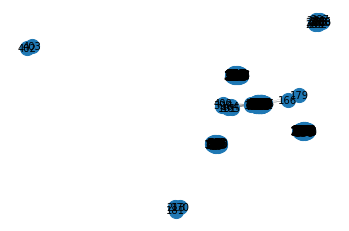

In [28]:
import matplotlib.pyplot as plt
import networkx as nx

Gexp = nx.Graph()

l = len(tweets_exp)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_exp)[i][j] != 0:
            print(i, j)
            Gexp.add_edge(str(i), str(j), weight = cosine_similarity(df_exp)[i][j])
#         sc = abs(score[i] - score[j])
#         if  sc != 0:
#             Gexp.add_edge(str(i), str(j), weight = sc)

e = [(u, v) for (u, v, d) in Gexp.edges(data=True)]

pos = nx.spring_layout(Gexp)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gexp, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gexp, pos, edgelist=e,
                       width=.1)
# labels
nx.draw_networkx_labels(Gexp, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [29]:
v = Gexp.number_of_nodes()
Gexp.number_of_edges()

11471

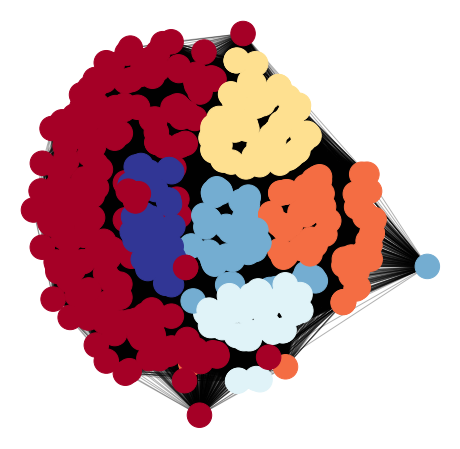

In [37]:
#plot of abstraction graph
import community
partitiona = community.best_partition(Gabs)
posa = nx.spring_layout(Gabs)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gabs, posa, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitiona.values()))
nx.draw_networkx_edges(Gabs, posa, alpha=0.3)
plt.show(Gabs)

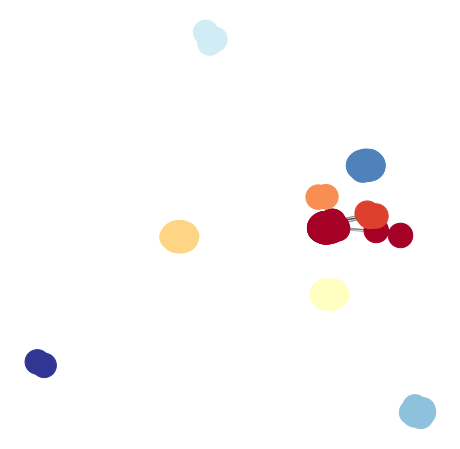

In [30]:
#plot of expression graph
import community
partitionb = community.best_partition(Gexp)
posb = nx.spring_layout(Gexp)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gexp, posb, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitionb.values()))
nx.draw_networkx_edges(Gexp, posb, alpha=0.3)
plt.show(Gexp)

In [38]:
from collections import Counter
count_abs = Counter(partitiona.values())
count_exp = Counter(partitionb.values())
print("clusters in abstraction graph: ", count_abs)
print("clusters in expression graph: ", count_exp)

clusters in abstraction graph:  Counter({0: 190, 2: 91, 1: 77, 3: 54, 4: 53, 5: 35})
clusters in expression graph:  Counter({0: 136, 7: 46, 4: 43, 3: 34, 6: 9, 1: 3, 5: 3, 2: 2, 8: 2})


In [39]:
m_abs = max(count_abs, key=count_abs.get)
m_exp = max(count_exp, key=count_exp.get)
v_abs = count_abs[m_abs]
v_exp = count_exp[m_exp]

In [40]:
abs_score = float(v_abs/v)
abs_score

0.38

In [33]:
exp_score = float(v_exp/v)
exp_score

0.4892086330935252

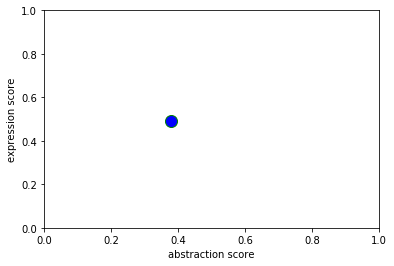

In [41]:
import matplotlib.pyplot as plt

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('abstraction score') 
# naming the y axis 
plt.ylabel('expression score') 
plt.plot(abs_score, exp_score, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()